In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss

In [2]:
Db = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
Db.shape # There are 5000 observations / rows and 14 attributes / columns.

(5000, 15)

In [4]:
Db.info() # Data type of each variable; number of values in each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   ID                  5000 non-null   int64  
 2   Age                 5000 non-null   int64  
 3   Experience          5000 non-null   int64  
 4   Income              5000 non-null   int64  
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Personal Loan       5000 non-null   int64  
 11  Securities Account  5000 non-null   int64  
 12  CD Account          5000 non-null   int64  
 13  Online              5000 non-null   int64  
 14  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 586.1 KB


##### The dataset provides customer information of a bank. 
This is a personalised marketing problem with a risk modelling element. 
The classification goal is to predict if a customer with liabilities with the bank (mortgage, credit card expenses)
 will avail(1 / 0) a personal loan.
 

In [5]:
Db.head()

,Unnamed: 0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
dupes = Db.duplicated() # No duplicates
sum(dupes)

0

In [7]:
Db.isnull().values.any() # No missing values

False

In [8]:
Db.sort_values(by=['Experience'])[Db.sort_values(by=['Experience']).Experience<0] 

,Unnamed: 0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


A number of years of experience are indicated as negative values, possibly due to human error. This was actually realised by an examination of the .csv file and sorting out the values in each column in ascending order for a preliminary analysis.
These values are being changed to positive values to maintain data inegrity

In [9]:
Db.loc[Db.Experience==-1,'Experience']=1
Db.loc[Db.Experience==-2,'Experience']=2
Db.loc[Db.Experience==-3,'Experience']=3


In [10]:
Db.sort_values(by=['Experience'])[Db.sort_values(by=['Experience']).Experience<0]  

,Unnamed: 0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [11]:
Db.to_csv('Bank_Personal_Loan_Modelling.csv')

# Understanding each attribute


1. ID - Customer ID (numeric 1 to 5000).  There is no correlation between customer ID and the chances of a customer availing a personal loan.

2. Age - Customer's age in completed years (numeric)

3. Experience - Years of Professional Experience (numeric)

4. Income - Annual Income of the Customer in thousands of dollars (numeric)

5. Zip Code - Zip Code of a customer's home address (categorical - Unique five digit number for each area - one entry had only a four digit identifier - possibly human error. Corrected as other columns appeared accurate)

6. Family - Family size of the customer (numeric)

7. CCAvg - Average spending on credit cards per month in thousands of dollars (numeric)

8. Education - Education Level (categorical - 1 -"Undergrad', 2 - "Graduate", 3 - "Advanced / Professional")

9. Mortgage - Value of house mortgage, if any in thousands of dollars (numeric)

10. Personal Loan - Target Variable - Personal loan availed - Yes (1) / No (0) (categorical)

11. Securities Account - Does the customer have a securities account with the bank - Yes (1) / No (0) (categorical)

12. CD Account - Does the customer have a Certificate of Deposit (Fixed Deposit, in India) with the bank - Yes (1) / No (0) (categorical)

13. Online - Does the customer use Internet Banking facilities - Yes (1) / No (0) (categorical)

14. CreditCard - Does the customer have a Universal Bank credit card - Yes (1) / No (0) (categorical)

In [12]:
Db[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0


# Data Distribution in Each Attribute

## Attribute - Age 

The bank has 5000 customers with ages ranging between 23 years and 67 years.  The mean customer age is 45 years.

According to "gopaysense.com", banks prefer giving loans to people in the age group of 30-50 years as they are considered financially stable. People in this age group have worked for a few years and still have several years left to repay the personal loan easily. People who are above 60 years age may find it challenging to repay personal loans.

https://www.gopaysense.com/blog/important-factors-personal-loan-applications/


#### How many customers fall within the age bracket 30 to 50 years?
#### How many of those customers have availed personal loans?
#### How is the attribute 'age' distributed? Is it skewed?
#### Is there any correlation between age of the customer and chances of availing a personal loan?

In [13]:
Db.loc[(Db['Age'] >= 30)&(Db['Age'] <=50)]['Age']

1       45
2       39
3       35
4       35
5       37
        ..
4987    48
4988    34
4992    30
4993    45
4996    30
Name: Age, Length: 2642, dtype: int64

The bank has 2642 customers in the target age bracket, which is healthy at 53%

In [14]:
Db.loc[(Db['Age'] >= 30) & (Db['Age'] <=50) & (Db['Personal Loan'] == 1)][['Age','Personal Loan']]

,Age,Personal Loan
9,34,1
16,38,1
18,46,1
29,38,1
38,42,1
...,...,...
4865,50,1
4876,44,1
4883,38,1
4927,43,1


As only 257 customers in the target age bracket have availed personal loans, there is adequate scope for the bank to market customised loans to 2385 customers without personal loans.

In [15]:
Db.skew()['Age'] # The age of customers is approximately symmetric with a slight negative skewness.  

-0.02934068151284029

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

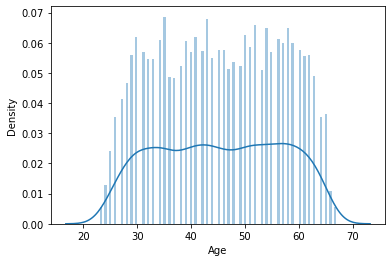

In [16]:
sns.distplot(Db['Age'],bins=100)

<AxesSubplot:>

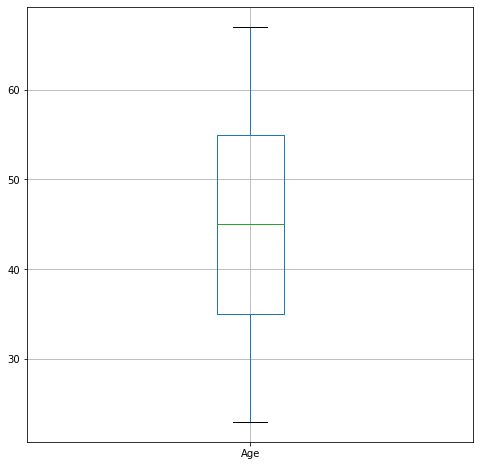

In [17]:
Db.boxplot(column="Age",return_type='axes',figsize=(8,8))

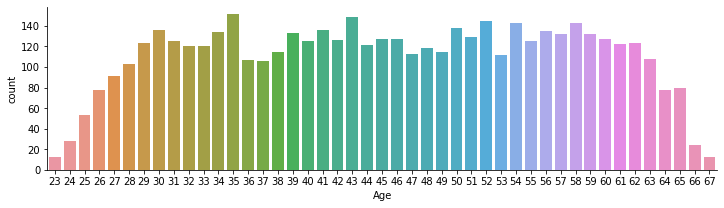

In [18]:
plt.figure(figsize=(12,3))
sns.countplot(x='Age',data=Db)
sns.despine()

To study the correlation between age and personal loans, it can be hypothesised that younger people are more likely to avail personal loans than older people:H1

Younger people spend more and have greater risk taking capacity.  Older people are more likely to be conservative in spending and their needs are lesser. Hence, it can be hypothesised that they are less likely to take personal loans.

The null hypothesis that needs to be rejected in this case is that older and younger age groups are both equally likely to avail personal loans if the oppurtunity arises :H0

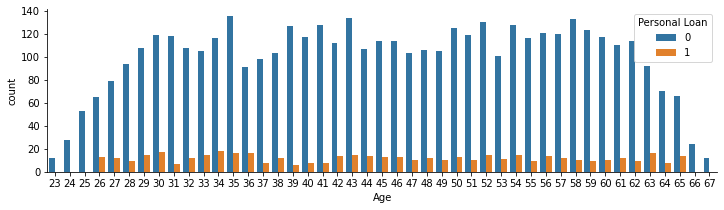

In [19]:
plt.figure(figsize=(12,3))
sns.countplot(x ='Age', hue = 'Personal Loan', data = Db)
sns.despine()

In [20]:
age = pd.crosstab(Db['Age'],Db['Personal Loan'])
print (age)

Personal Loan    0   1
Age                   
23              12   0
24              28   0
25              53   0
26              65  13
27              79  12
28              94   9
29             108  15
30             119  17
31             118   7
32             108  12
33             105  15
34             116  18
35             135  16
36              91  16
37              98   8
38             103  12
39             127   6
40             117   8
41             128   8
42             112  14
43             134  15
44             107  14
45             114  13
46             114  13
47             103  10
48             106  12
49             105  10
50             125  13
51             119  10
52             130  15
53             101  11
54             128  15
55             116   9
56             121  14
57             120  12
58             133  10
59             123   9
60             117  10
61             110  12
62             114   9
63              92  16
64         

In [21]:
pd.crosstab(Db['Age'],Db['Personal Loan']).apply(lambda a: a/a.sum(), axis=1) # Analyzing in % terms

Personal Loan,0,1
Age,,
23,1.000000,0.000000
24,1.000000,0.000000
25,1.000000,0.000000
26,0.833333,0.166667
27,0.868132,0.131868
28,0.912621,0.087379
29,0.878049,0.121951
30,0.875000,0.125000
31,0.944000,0.056000


It can be observed that between the ages of 25 and 65 years, individuals in every age group have availed personal loans in similar numbers in most age bands. The data does not indicate that the null hypothesis can be rejected. Applicants whether young or old avail the oppurtunities to take personal loans, in this dataset. So given other attributes while it may be true that the age group 30 to 50 years is preferred for loan disbursement, for this dataset the bank must market personal loans to all age groups, in future.

# Attribute - Professional Experience

A critical factor that banks consider is an experience. For, e.g., a person with 15 years of experience will be given preference over some who are just starting out or has only 2-3 years of experience. Banks also prefer borrowers who have been serving in the same industry for a few years while considering the loan application. In case a person has a record of shifting professions rapidly, then a bank may not approve their loan easily.

https://www.gopaysense.com/blog/important-factors-personal-loan-applications/

The mean experience of the customers in the bank is 20 years.  Customers range from no professional experience to 43 years of experience.

It can be hypothesised that younger customers will have lower professional experience and older customers will have a higher professional experience.:H0

Age and professional experience have no relation to each other:H1

#### Is there any correlation between age of customers and their professional experience?
#### How is data related to professional experience distributed? Is it skewed?




In [22]:
Db.skew()['Experience'] # The professional experience of customers is almost symmetric with a slight negative skewness.  

-0.010037994995886824

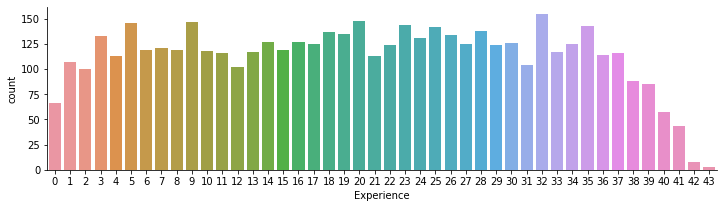

In [23]:
plt.figure(figsize=(12,3))
sns.countplot(x='Experience',data=Db)
sns.despine()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

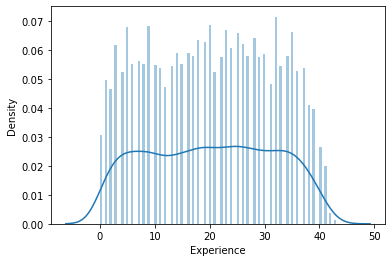

In [24]:
sns.distplot(Db['Experience'],bins=100)

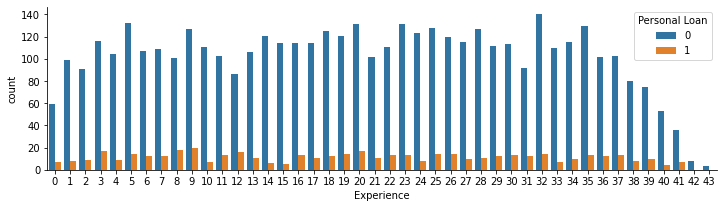

In [25]:
plt.figure(figsize=(12,3))
sns.countplot(x ='Experience', hue = 'Personal Loan', data = Db) # Compare Professional Exprience with Personal Loans
sns.despine()

Personal loans have been availed by customers with no professional experience to very significant professional experience.

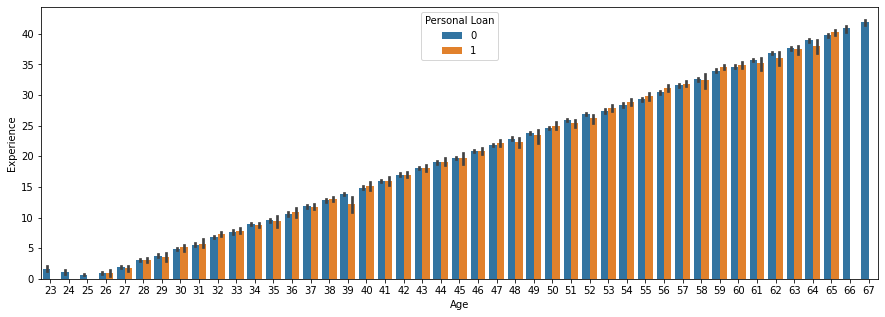

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(data=Db,x='Age',y='Experience',hue='Personal Loan')
plt.show()

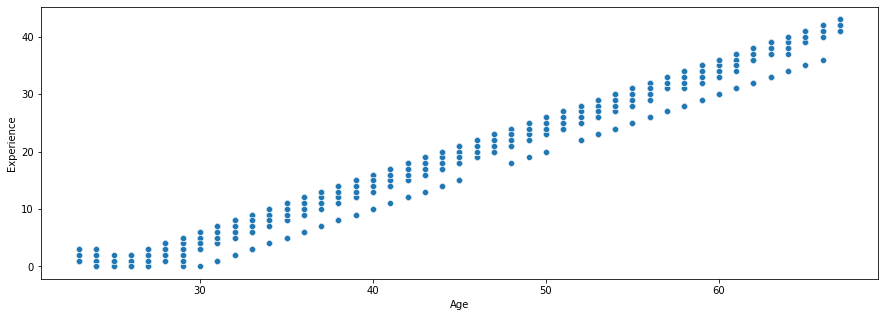

In [27]:
figure = plt.figure(figsize=(15,5))
ax = sns.scatterplot(x=Db['Age'],y='Experience', data=Db) 

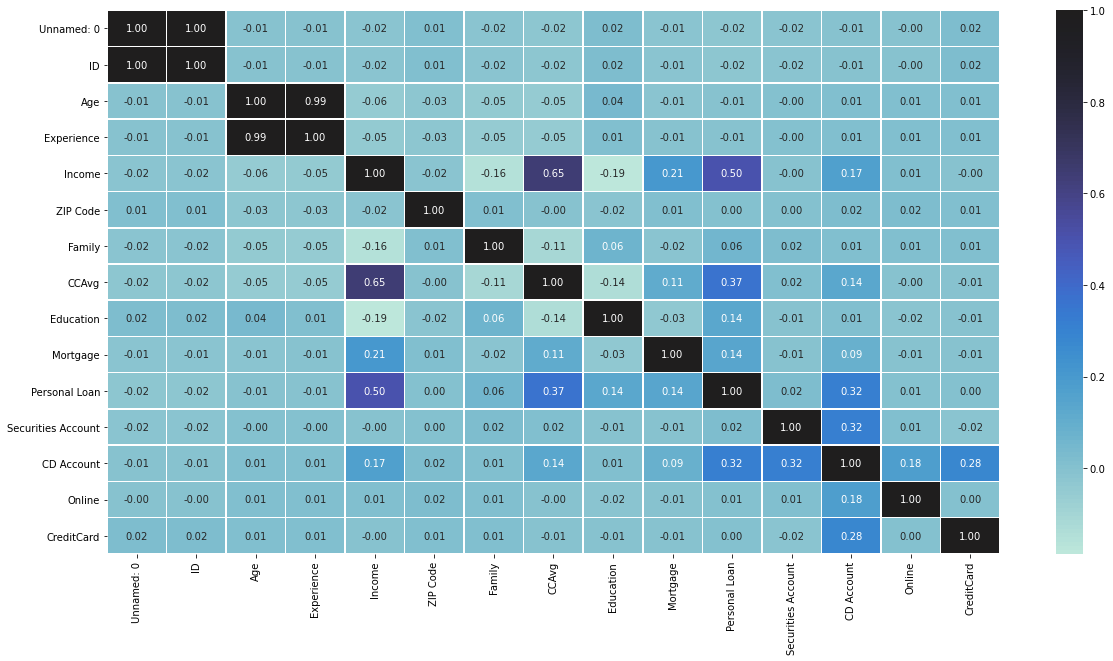

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(Db.corr(), annot=True, linewidths=.5, fmt= '.2f', center = 1 )  
plt.show()

In [29]:
Db.corr()

,Unnamed: 0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Unnamed: 0,1.000000,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
ID,1.000000,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231


The strong positive correlation between age and professional experience (0.99) is clearly established. The null hypothesis has not been rejected. Hence, further analysis of professional experience as a factor for loans is not needed.  This attribute can be dropped. By considering age as a factor for deciding loan eligibility, aspects related to professional experience are accounted for in this dataset.

# Attribute - Income

A study of the heat map and correlation table created earlier shows that income is strongly positively correlated (0.50) to customers availing personal loans.

In [30]:
Db.skew()['Income'] #  Customer incomes are moderately positively skewed.  

0.8413386072610816

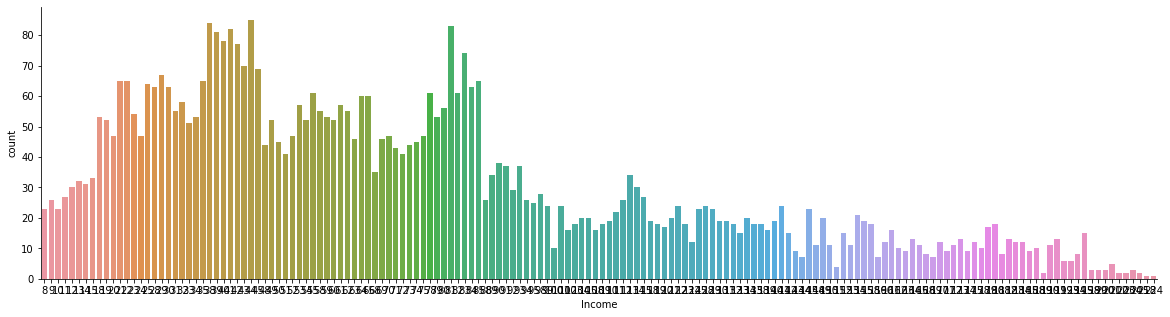

In [31]:
plt.figure(figsize=(20,5))
sns.countplot(x='Income',data=Db)
sns.despine()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


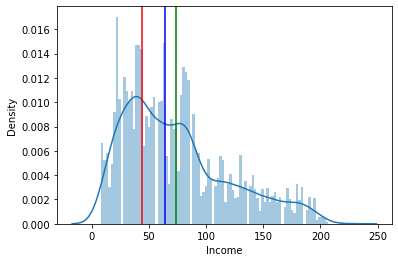

In [32]:
sns.distplot(Db['Income'],bins=100)
mean=Db['Income'].mean()
median=Db['Income'].median()
mode=Db['Income'].mode()
plt.axvline(mean,color='green',label='Mean')    
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

It can be hypothesised that lower income group customers are more likely to avail personal loans and higher income group customers are less likely to avail personal loans: H0. The data skew indicates that this hypothesis stands a chance of rejection.

Alternately, as loans are a function of financial need for various reasons, it is possible that customers in all income groups need and avail personal loans depending on circumstances: H1

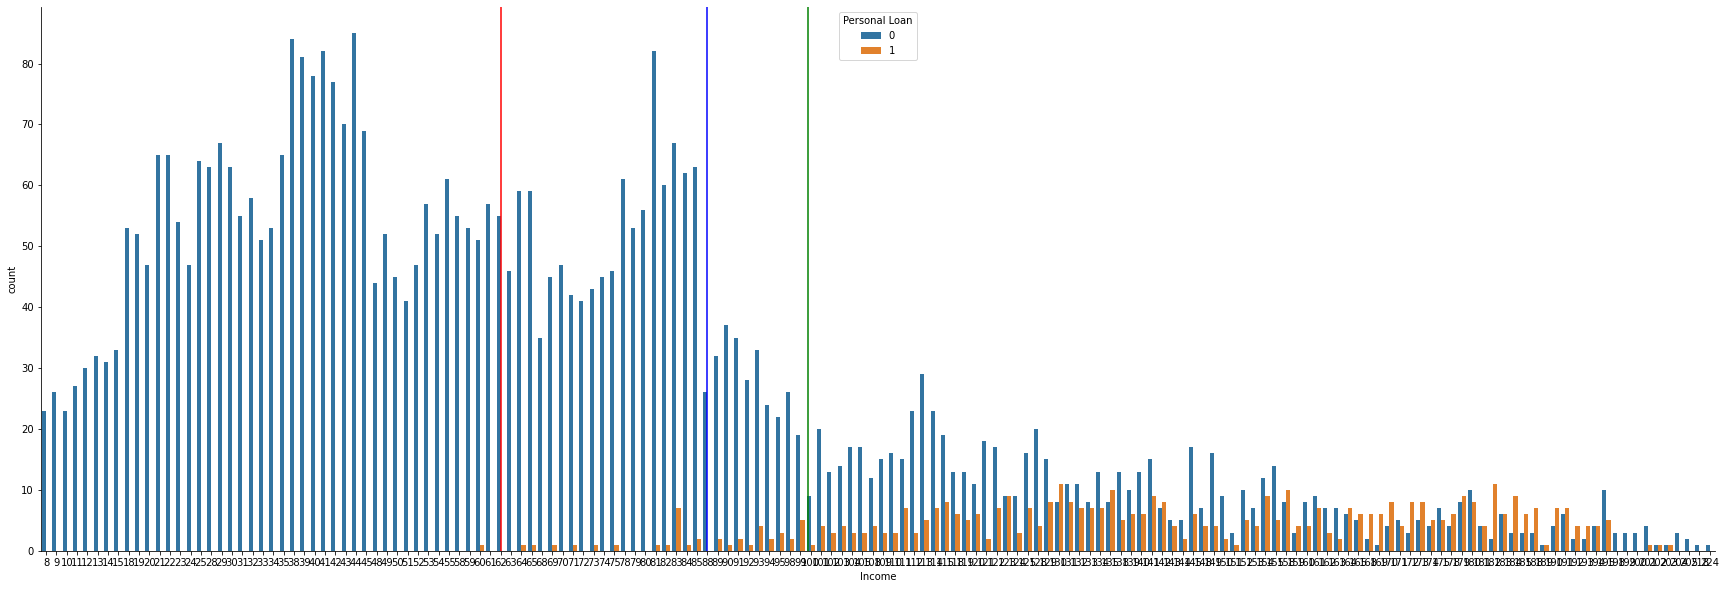

In [33]:
plt.figure(figsize=(30,10))
sns.countplot(x ='Income', hue = 'Personal Loan', data = Db) # Compare Professional Exprience with Personal Loans
sns.despine()
mean=Db['Income'].mean()
median=Db['Income'].median()
mode=Db['Income'].mode()
plt.axvline(mean,color='green',label='Mean')    
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

# Atttribute - Credit Card Popularity and Average Spending

Credit card average spendings are correlated positively with income and personal loan.  They are correlated with other attributes as well, but those will be studied later.

#### How many customers have Credit Cards? 

It can be hypothesised that higher income groups spend more on their credit cards and lower income groups spend lesser on their cards. H0 

It can also be hypothesised that higher the personal loan that is availed by a customer, higher the credit card spending H0

In [34]:
Db.loc[Db.CreditCard==1,'CreditCard']

4       1
7       1
15      1
19      1
24      1
       ..
4984    1
4988    1
4990    1
4991    1
4999    1
Name: CreditCard, Length: 1470, dtype: int64

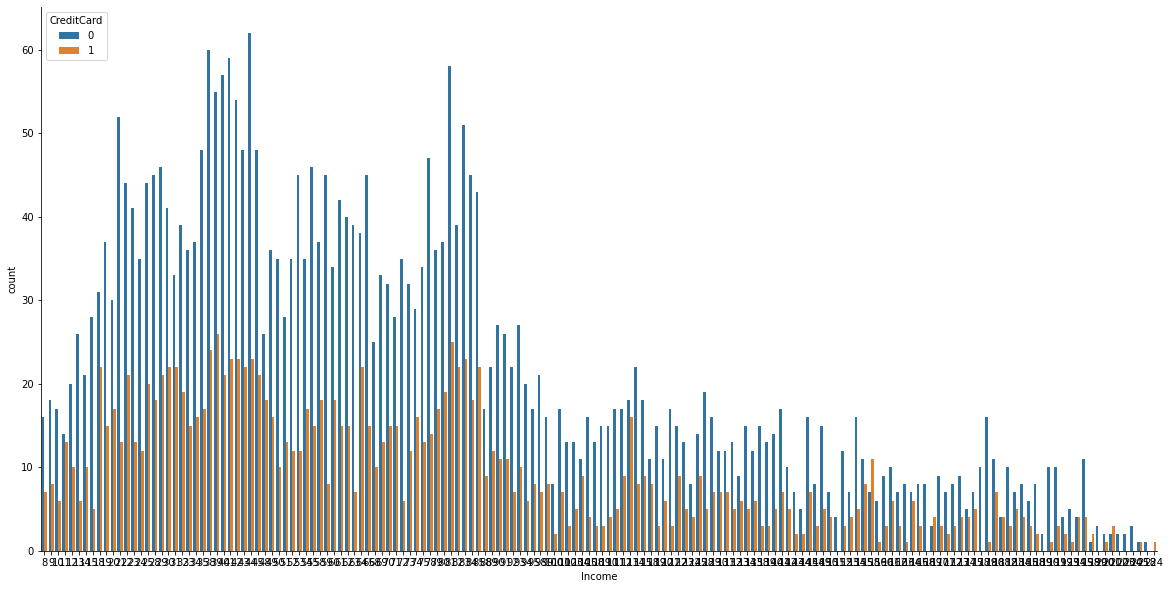

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x ='Income', hue = 'CreditCard', data = Db)
sns.despine()

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

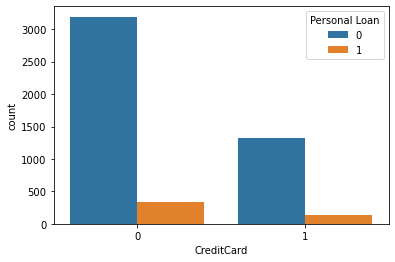

In [36]:
sns.countplot(x="CreditCard", data=Db, hue="Personal Loan")

In [37]:
pd.crosstab(Db['CreditCard'],Db['Personal Loan'])

Personal Loan,0,1
CreditCard,,
0,3193,337
1,1327,143


Out of 5000 customers, only 1470 have credit cards (nearly 29%). Credit card penetration is relatively low.  However, credit cards as a device are popular across all income groups.  There is no direct correlation between the customers who have / own credit cards and their preference to avail loans. A study of the average credit card expenditure may reveal more aspects.

1400.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


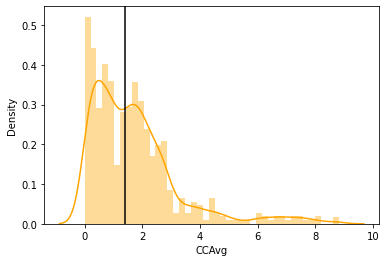

In [38]:
sns.distplot( Db[Db['Personal Loan'] == 0]['CCAvg'], color = 'orange')
print( Db[Db['Personal Loan'] == 0]['CCAvg'].median()*1000)
plt.axvline( Db[Db['Personal Loan'] == 0]['CCAvg'].median(),color='black')

3800.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


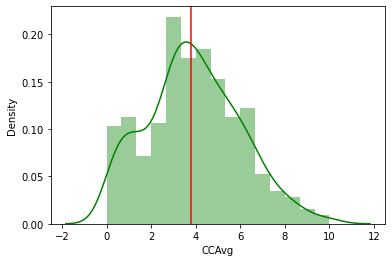

In [39]:
sns.distplot( Db[Db['Personal Loan'] == 1]['CCAvg'], color = 'green')
print( Db[Db['Personal Loan'] == 1]['CCAvg'].median()*1000)
plt.axvline( Db[Db['Personal Loan'] == 1]['CCAvg'].median(),color='red')

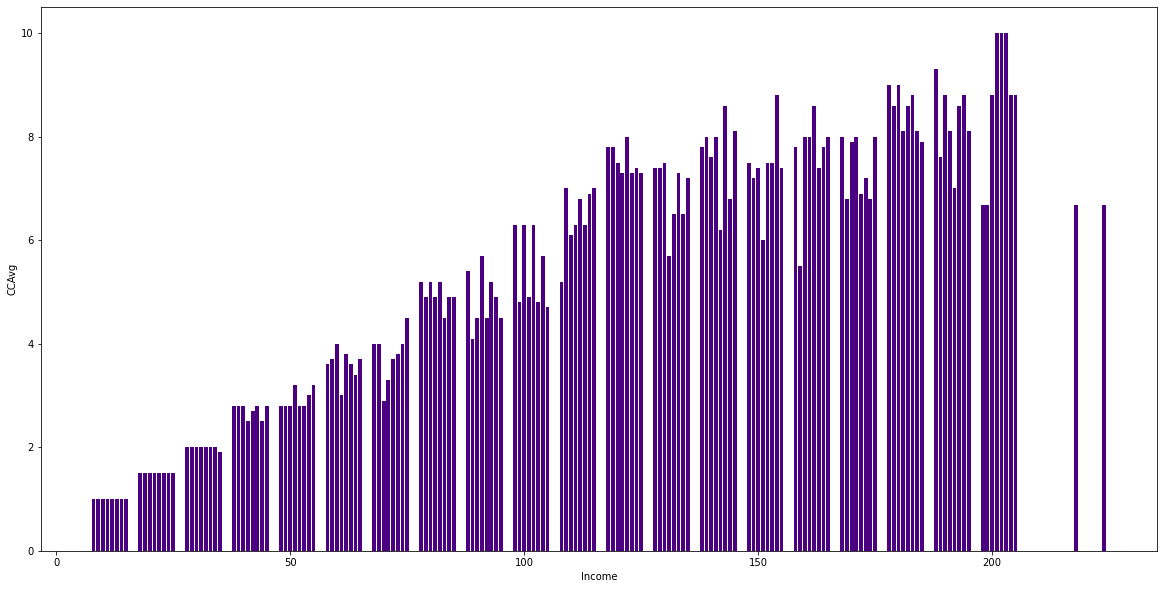

In [40]:
plt.figure(figsize=(20,10))
plt.bar(Db['Income'], Db['CCAvg'], color='indigo') 
plt.xlabel("Income") 
plt.ylabel("CCAvg") 
plt.show() 

# Attribute - Mortgage

Mortgages are positively correlated to income and personal loans.

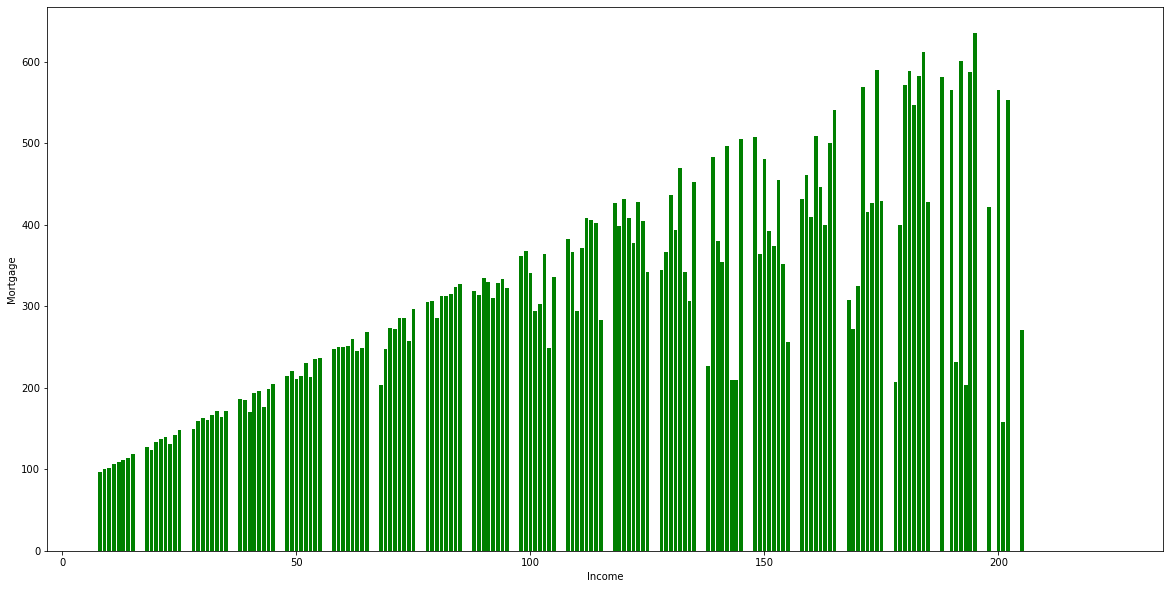

In [41]:
plt.figure(figsize=(20,10))
plt.bar(Db['Income'], Db['Mortgage'], color='green') 
plt.xlabel("Income") 
plt.ylabel("Mortgage") 
plt.show() 

In [42]:
Db.loc[(Db['Mortgage']==0)].groupby('Personal Loan').count()['Mortgage']


Personal Loan
0    3150
1     312
Name: Mortgage, dtype: int64

In [43]:
Db.loc[(Db['Mortgage']>0)].groupby('Personal Loan').count()['Mortgage']


Personal Loan
0    1370
1     168
Name: Mortgage, dtype: int64

It is clear that in most cases, as the customer's income increases, the ability to take larger mortgages increases. However, 63% of the customers have no mortgage or personal loan. Only 3% customers have both mortgages and personal loans. No useful conclusions can be drawn from this analysis. The presence of outliers is noted.

# Attribute - Family, Education

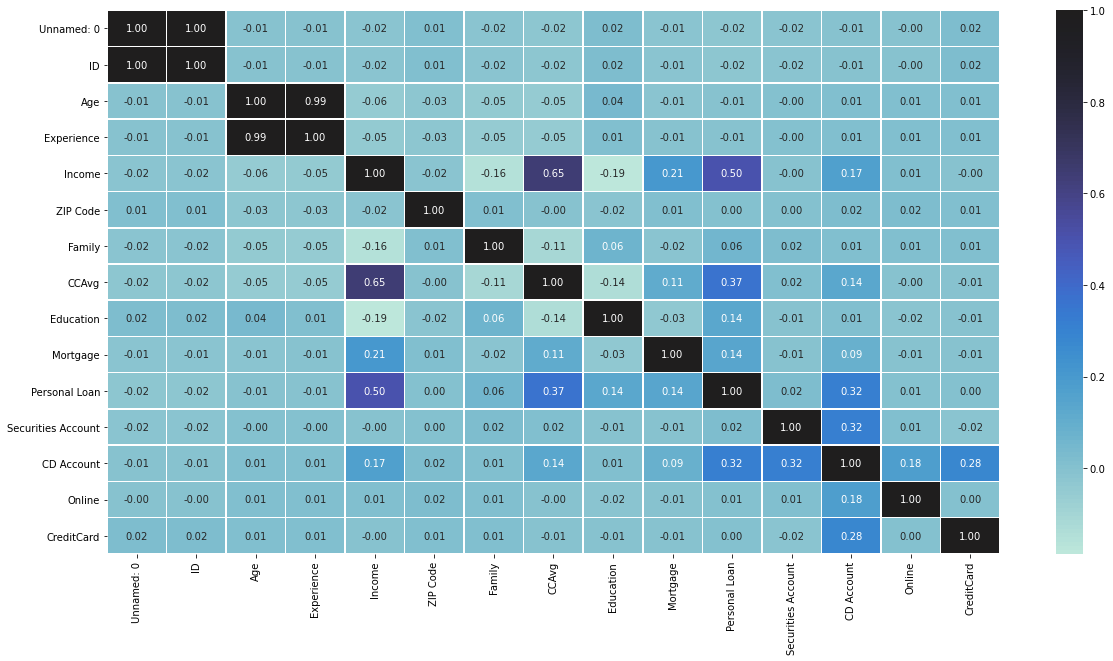

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(Db.corr(), annot=True, linewidths=.5, fmt= '.2f', center = 1 )  
plt.show()

The attribute 'family' does not have any significant direct correlation with other attributes.  However, it can be hypothesised that,
larger families are more likely to avail personal loans to meet requirements such as higher education. H0

Alternately, if more family members are earning, the requirement of personal loans is not significant. H1

<AxesSubplot:xlabel='Family', ylabel='count'>

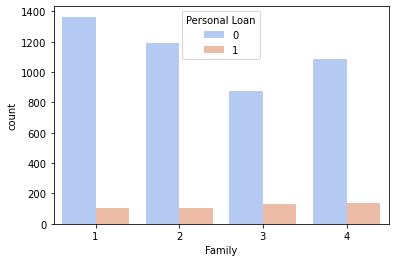

In [45]:
sns.countplot(x='Family',data=Db,hue='Personal Loan',palette='coolwarm')

In this dataset, it appears that larger families do take more loans but the differences in each category are not significant. So, the rejection of the null hypothesis is inconclusive. 

<AxesSubplot:xlabel='Education', ylabel='count'>

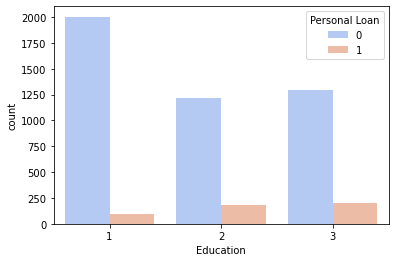

In [46]:
sns.countplot(x='Education',data=Db,hue='Personal Loan',palette='coolwarm')

In [47]:
Db.loc[(Db['Education']==1)].groupby('Personal Loan').count()['Education']

Personal Loan
0    2003
1      93
Name: Education, dtype: int64

In [48]:
Db.loc[(Db['Education']==2)].groupby('Personal Loan').count()['Education']

Personal Loan
0    1221
1     182
Name: Education, dtype: int64

In [49]:
Db.loc[(Db['Education']==3)].groupby('Personal Loan').count()['Education']

Personal Loan
0    1296
1     205
Name: Education, dtype: int64

Customers who are more educated do take more loans. Customers who are at undergrad level are less likely to take personal loans. Thus, the bank can study its customer dataset and offer more loans to customers with higher education without loans. 

# Attribute - CD Deposits, Securities account

CD Deposits are correlated to various degrees with income, credit card expenditure, mortgage, personal loans, securities account, and online transactions.

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

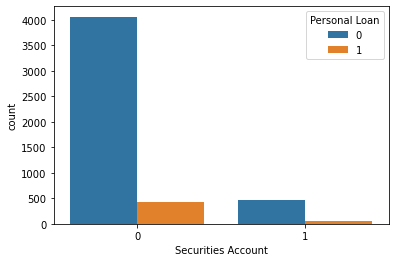

In [50]:
sns.countplot(x="Securities Account", data=Db,hue="Personal Loan")

It appears that most customers who don't have a securities account with the bank also don't take personal loans. 

<AxesSubplot:xlabel='Securities Account', ylabel='Online'>

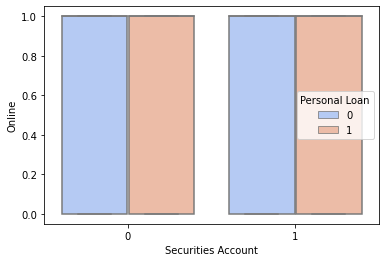

In [51]:
sns.boxplot(x="Securities Account", y='Online', hue="Personal Loan", data=Db, palette='coolwarm')

Customers internet banking preferences don't seem to have any relation to their not opening Securities Accounts with the bank.

<AxesSubplot:xlabel='CD Account', ylabel='count'>

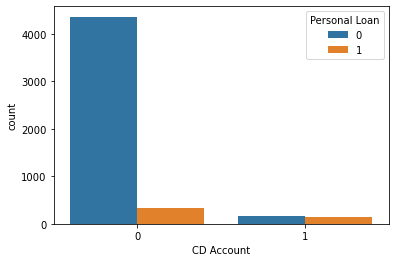

In [52]:
sns.countplot(x="CD Account", data=Db,hue="Personal Loan")

It appears that most customers who don't have a CD account with the bank also don't take personal loans. 

It can be hypothesised that more educated customers are also higher income group customers. H0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

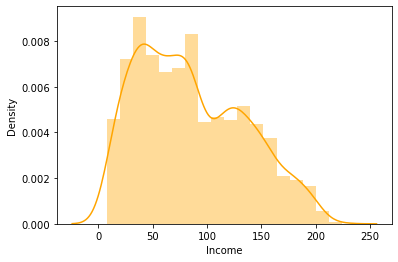

In [53]:
sns.distplot( Db[Db['Education'] == 1]['Income'], color = 'orange')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

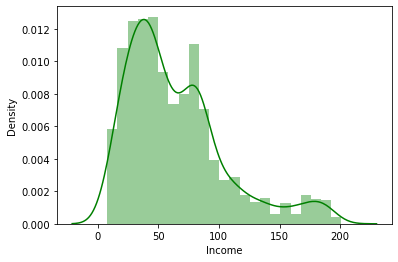

In [54]:
sns.distplot( Db[Db['Education'] == 2]['Income'], color = 'green')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

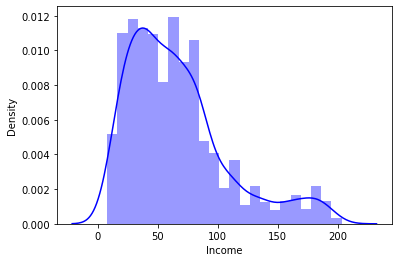

In [55]:
sns.distplot( Db[Db['Education'] == 3]['Income'], color = 'blue')

Educational qualifications are not a guarantee for high income amongst the bank customers.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

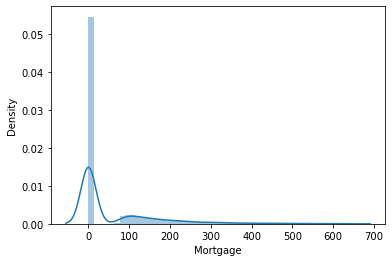

In [56]:
sns.distplot(Db['Mortgage'])

In [57]:
Db.kurt() # The presence of outliers in various columns is confirmed.

Unnamed: 0             -1.200000
ID                     -1.200000
Age                    -1.153067
Experience             -1.144457
Income                 -0.044244
ZIP Code              486.204272
Family                 -1.403586
CCAvg                   2.646706
Education              -1.546116
Mortgage                4.756797
Personal Loan           5.529589
Securities Account      4.701013
CD Account             11.633404
Online                 -1.844883
CreditCard             -1.182191
dtype: float64

In [58]:
from scipy import stats
z=np.abs(stats.zscore(Db.Mortgage))
threshold=3
print(np.where(z>3))

(array([  42,   59,  119,  288,  303,  327,  338,  354,  365,  459,  473,
        479,  528,  570,  679,  684,  782,  888,  952, 1023, 1111, 1162,
       1167, 1273, 1277, 1288, 1303, 1304, 1328, 1359, 1372, 1623, 1674,
       1716, 1736, 1783, 1789, 1875, 1889, 1937, 1970, 2027, 2041, 2076,
       2217, 2319, 2382, 2394, 2422, 2443, 2541, 2590, 2653, 2668, 2687,
       2714, 2753, 2768, 2769, 2776, 2812, 2841, 2934, 2942, 2946, 2956,
       2989, 3012, 3020, 3021, 3065, 3209, 3304, 3357, 3373, 3411, 3467,
       3470, 3472, 3515, 3571, 3608, 3612, 3620, 3662, 3702, 3776, 3875,
       3884, 3919, 3945, 4016, 4238, 4240, 4294, 4345, 4422, 4541, 4585,
       4655, 4672, 4698, 4812, 4842, 4859], dtype=int64),)


In [59]:
Db1=Db[(z< 3)] # Removing the outliers using Z Score method.

In [60]:
Db1.shape # 105 outlier entries have been removed from the original dataabase of 5000 entries (< 5%)

(4895, 15)

In [61]:
Db1.kurt()

Unnamed: 0             -1.203497
ID                     -1.203497
Age                    -1.152227
Experience             -1.143849
Income                  0.108628
ZIP Code              491.866492
Family                 -1.410363
CCAvg                   2.848349
Education              -1.548795
Mortgage                1.795811
Personal Loan           6.409662
Securities Account      4.701843
CD Account             12.433209
Online                 -1.845808
CreditCard             -1.189732
dtype: float64

In [62]:
Db1.drop('ID',axis=1,inplace=True)
Db1.drop('ZIP Code',axis=1,inplace=True) # ID and ZIP code are just series of numbers with no analytical value.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
Db1.head()

,Unnamed: 0,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [64]:
Db1.isnull().values.any() # Just a crosscheck!

False

In [65]:
n_true = len(Db1.loc[Db1['Personal Loan'] == True])
n_false = len(Db1.loc[Db1['Personal Loan'] == False])
print("Number of customers with personal loans: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of customers without personal loans: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of customers with personal loans: 433 (8.85%)
Number of customers without personal loans: 4462 (91.15%)


# Splitting the data

In [66]:
from sklearn.model_selection import train_test_split

X = Db1.drop('Personal Loan',axis=1)     
Y = Db1['Personal Loan']   

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 - random seed number

x_train.head()

,Unnamed: 0,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3402,3402,64,40,95,2,0.0,3,0,0,0,1,1
4688,4688,29,3,69,4,1.8,2,0,0,0,1,1
4505,4505,40,15,90,4,1.1,2,0,1,0,1,0
2238,2238,48,22,35,1,1.4,3,0,0,0,1,0
3,3,35,9,100,1,2.7,2,0,0,0,0,0


In [67]:
print("{0:0.2f}% Data in training set".format((len(x_train)/len(Db1.index)) * 100)) # Check the data split.
print("{0:0.2f}% Data in test set".format((len(x_test)/len(Db1.index)) * 100))

69.99% Data in training set
30.01% Data in test set


In [68]:
print("Original Personal Loan Availed   : {0} ({1:0.2f}%)".format(len(Db1.loc[Db1['Personal Loan'] == 1]), (len(Db1.loc[Db1['Personal Loan'] == 1])/len(Db1.index)) * 100))
print("Original Personal Loan Not Availed   : {0} ({1:0.2f}%)".format(len(Db1.loc[Db1['Personal Loan'] == 0]), (len(Db1.loc[Db1['Personal Loan'] == 0])/len(Db1.index)) * 100))
print("")
print("Training Personal Loan Availed    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan Not Availed   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan Availed        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan Not Availed      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan Availed   : 433 (8.85%)
Original Personal Loan Not Availed   : 4462 (91.15%)

Training Personal Loan Availed    : 305 (8.90%)
Training Personal Loan Not Availed   : 3121 (91.10%)

Test Personal Loan Availed        : 128 (8.71%)
Test Personal Loan Not Availed      : 1341 (91.29%)



## Normalizing the Data using Z-score

In [89]:
xtrainsc = x_train.apply(zscore)
xtestsc = x_test.apply(zscore)

## Create the decision tree model using “Gini” method of reducing the entropy and fit it to training data

In [90]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(xtrainsc, y_train)

DecisionTreeClassifier(random_state=1)

In [91]:
print(dTree.score(xtrainsc,y_train))
print(dTree.score(xtestsc,y_test))

1.0
0.9768550034036759


## Visualizing the Decision Tree

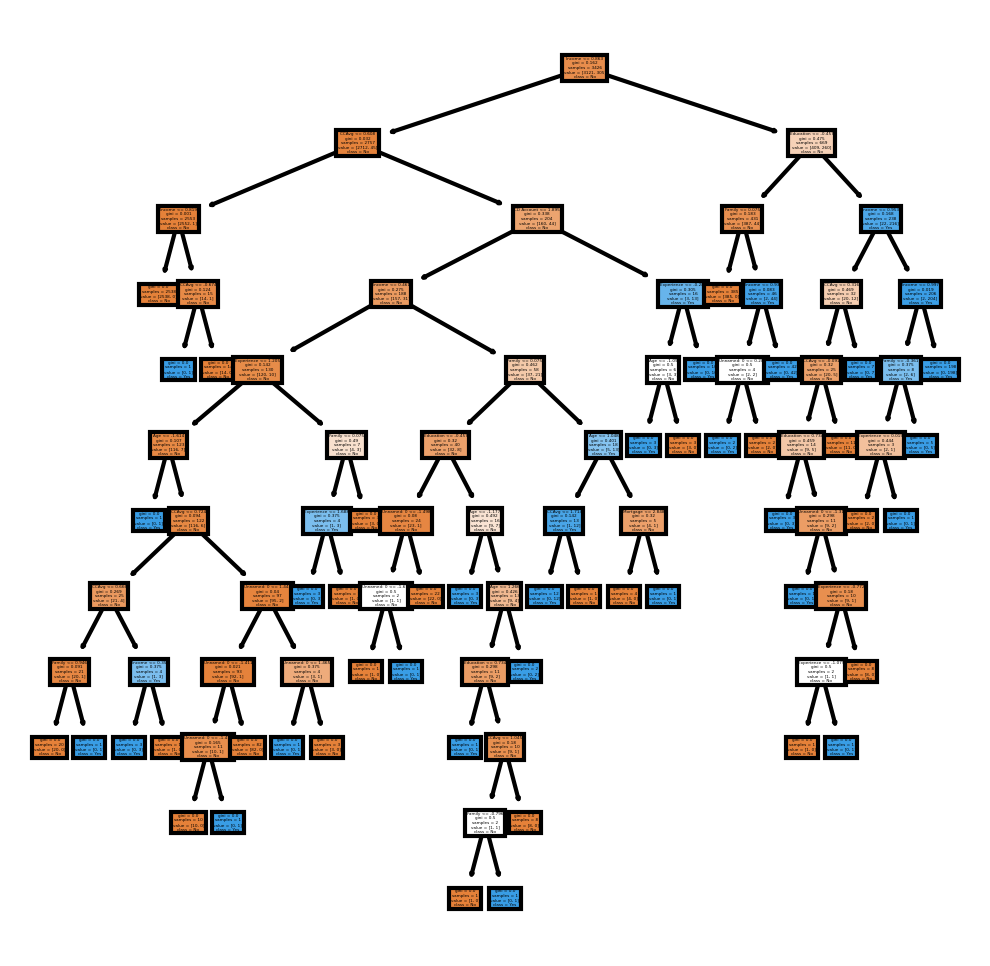

In [92]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(x_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

## Reducing over fitting (Regularization)

In [93]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(xtrainsc, y_train)
print(dTreeR.score(xtrainsc, y_train))
print(dTreeR.score(xtestsc, y_test))

0.9851138353765324
0.9775357385976855


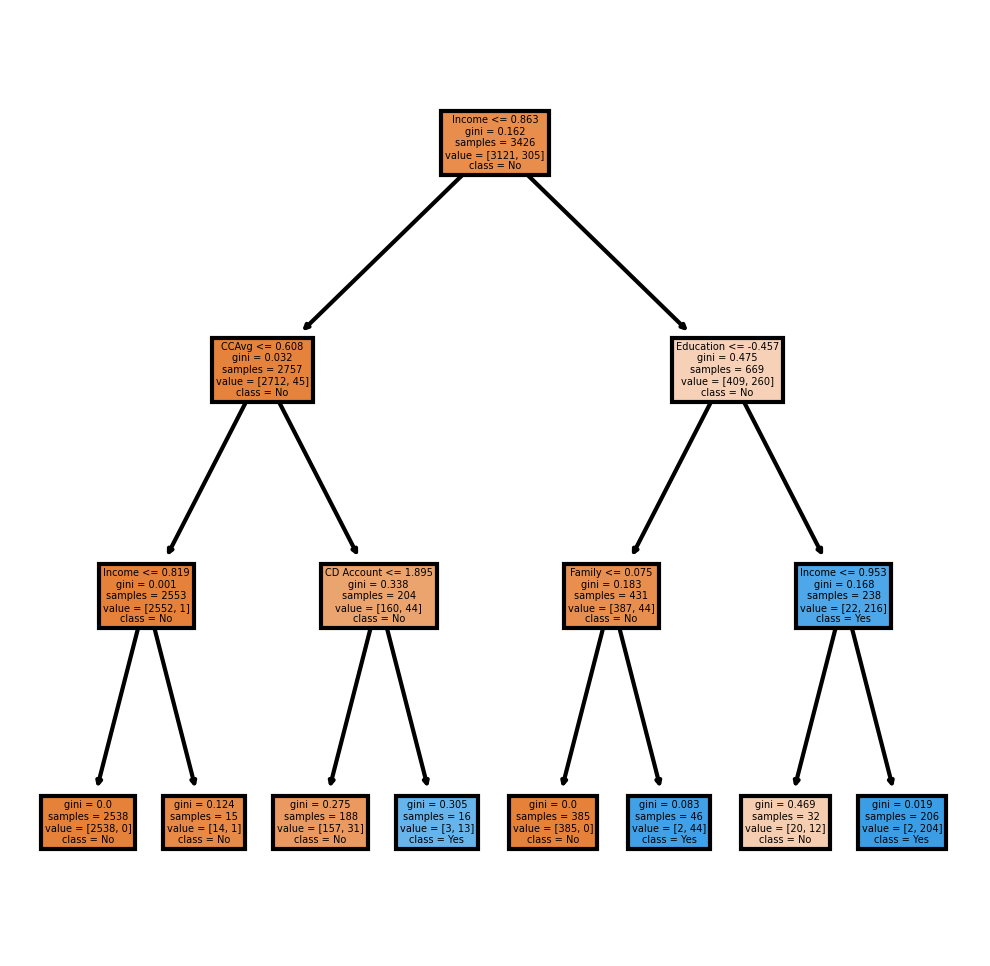

In [94]:
fn = list(x_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTreeR, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

## Printing the confusion matrix

0.9775357385976855


<AxesSubplot:>

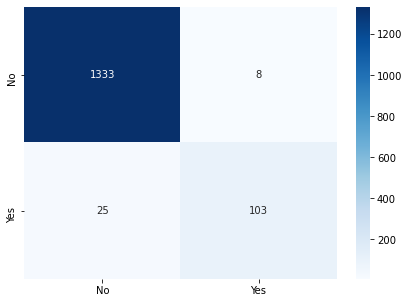

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dTreeR.score(xtestsc , y_test))
y_predict = dTreeR.predict(xtestsc)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Blues')

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from numpy import sqrt
from numpy import argmax

## Classification Report

In [123]:
ypred = dTreeR.predict(xtestsc)
print(classification_report(y_test, ypred, digits=5))


              precision    recall  f1-score   support

           0    0.98159   0.99403   0.98777      1341
           1    0.92793   0.80469   0.86192       128

    accuracy                        0.97754      1469
   macro avg    0.95476   0.89936   0.92485      1469
weighted avg    0.97691   0.97754   0.97681      1469



Best Threshold=0.066667, G-Mean=0.962


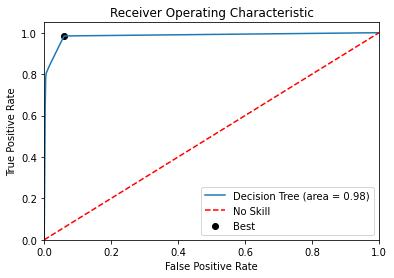

In [153]:
decision_roc_auc = roc_auc_score(y_test, dTreeR.predict_proba(xtestsc)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dTreeR.predict_proba(xtestsc)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % decision_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('DecisionTree_ROC')
plt.show()

## Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion="gini",random_state=1,max_depth=4 )
clf.fit(xtrainsc,y_train)

RandomForestClassifier(max_depth=4, random_state=1)

In [99]:
print(clf.score(xtrainsc,y_train))
print(clf.score(xtestsc,y_test))

0.9667250437828371
0.9673247106875426


0.9673247106875426


<AxesSubplot:>

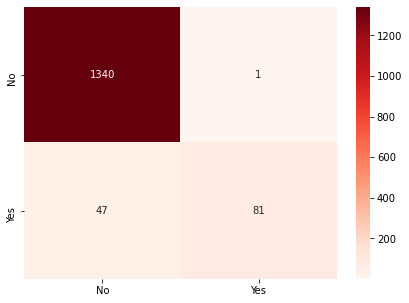

In [100]:
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(xtestsc)
print(clf.score(xtestsc, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap="Reds")

In [138]:
RF_test_model_pred=clf.predict(xtestsc)
print("Classification Report")
print(metrics.classification_report(y_test, RF_test_model_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.99      0.63      0.77       128
           0       0.97      1.00      0.98      1341

    accuracy                           0.97      1469
   macro avg       0.98      0.82      0.88      1469
weighted avg       0.97      0.97      0.96      1469



Best Threshold=0.174297, G-Mean=0.945


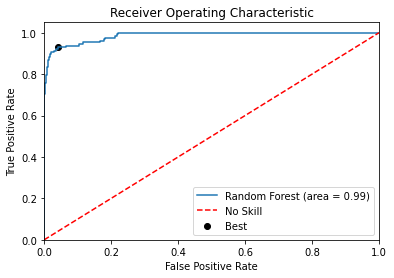

In [144]:
rf_roc_auc = roc_auc_score(y_test, clf.predict_proba(xtestsc)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(xtestsc)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('DecisionTree_ROC')
plt.show()

## Bagging Classifier

In [112]:
from sklearn.ensemble import BaggingClassifier


bgcl = BaggingClassifier(base_estimator=dTree,n_estimators=70,random_state=1,max_features=3)

bgcl = bgcl.fit(xtrainsc, y_train)

In [113]:
print(bgcl.score(xtrainsc,y_train))
print(bgcl.score(xtestsc,y_test))

0.9439579684763573
0.9128658951667801


0.9128658951667801


<AxesSubplot:>

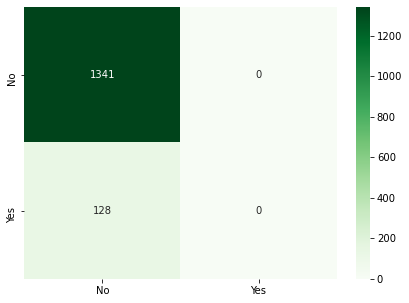

In [114]:
from sklearn.metrics import confusion_matrix
y_predict = bgcl.predict(xtestsc)
print(bgcl.score(xtestsc, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap="Greens")

Best Threshold=0.138351, G-Mean=0.890


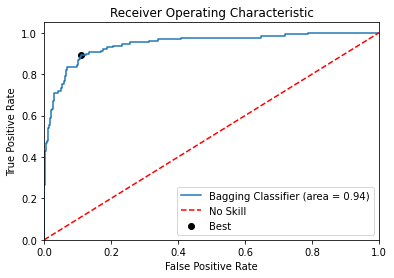

In [147]:
bagging_roc_auc = roc_auc_score(y_test, bgcl.predict_proba(xtestsc)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, bgcl.predict_proba(xtestsc)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Bagging Classifier (area = %0.2f)' % bagging_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Bagging_ROC')
plt.show()

## AdaBoosting Classifier

In [115]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(n_estimators=50,random_state=1)
abcl.fit(xtrainsc,y_train)
print(abcl.score(xtrainsc,y_train))
print(abcl.score(xtestsc,y_test))

0.978984238178634
0.9686861810755616


0.9686861810755616


<AxesSubplot:>

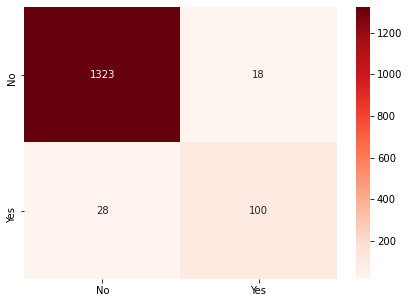

In [117]:
from sklearn.metrics import confusion_matrix
y_predict = abcl.predict(xtestsc)
print(abcl.score(xtestsc, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap="Reds")

In [148]:
Ada_test_model_pred=abcl.predict(xtestsc)
print("Classification Report")
print(metrics.classification_report(y_test, Ada_test_model_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.85      0.78      0.81       128
           0       0.98      0.99      0.98      1341

    accuracy                           0.97      1469
   macro avg       0.91      0.88      0.90      1469
weighted avg       0.97      0.97      0.97      1469



Best Threshold=0.489935, G-Mean=0.931


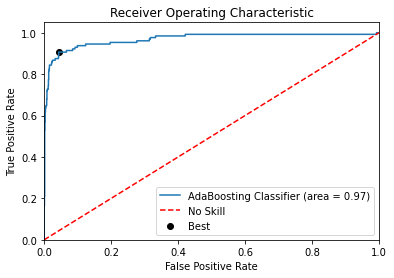

In [149]:
adaboosting_roc_auc = roc_auc_score(y_test, abcl.predict_proba(xtestsc)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, abcl.predict_proba(xtestsc)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoosting Classifier (area = %0.2f)' % adaboosting_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('AdaBoosting_ROC')
plt.show()

## Gradient Boosting Classifier

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(xtrainsc, y_train)
print(gbcl.score(xtrainsc,y_train))
print(gbcl.score(xtestsc,y_test))

0.9918272037361354
0.9816201497617427


0.9816201497617427


<AxesSubplot:>

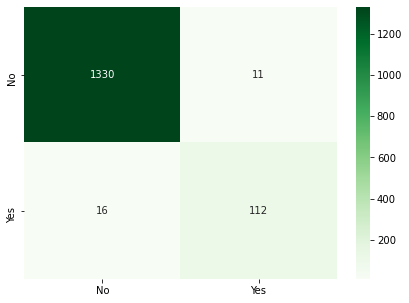

In [155]:
from sklearn.metrics import confusion_matrix
y_pred=gbcl.predict(xtestsc)
print(gbcl.score(xtestsc,y_test))
cm=confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap="Greens")

In [151]:
Gradient_test_model_pred=gbcl.predict(xtestsc)
print("Classification Report")
print(metrics.classification_report(y_test, Gradient_test_model_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.91      0.88      0.89       128
           0       0.99      0.99      0.99      1341

    accuracy                           0.98      1469
   macro avg       0.95      0.93      0.94      1469
weighted avg       0.98      0.98      0.98      1469



Best Threshold=0.019872, G-Mean=0.968


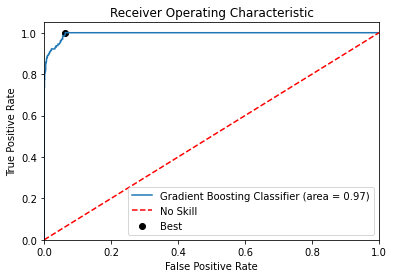

In [169]:
gradientboosting_roc_auc = roc_auc_score(y_test, gbcl.predict_proba(xtestsc)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, gbcl.predict_proba(xtestsc)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Classifier (area = %0.2f)' % adaboosting_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('GradientBoosting_ROC')
plt.show()

## Support Vector Machine Classifier

In [162]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(xtrainsc, y_train)

prediction = svc_model .predict(xtestsc)



In [164]:
# check the accuracy on the training set
print(f"Train Accuracy: {svc_model.score(xtrainsc, y_train)}")
print(f"Test Accuracy {svc_model.score(xtestsc, y_test)}")

Train Accuracy: 0.9544658493870403
Test Accuracy 0.9523485364193329


0.9523485364193329


<AxesSubplot:>

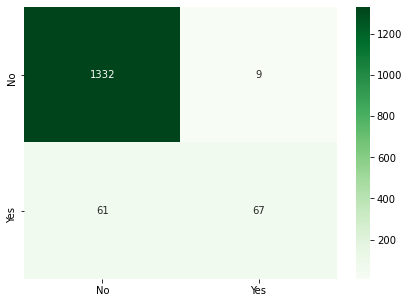

In [165]:
from sklearn.metrics import confusion_matrix
y_pred=svc_model.predict(xtestsc)
print(svc_model.score(xtestsc,y_test))
cm=confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap="Greens")

In [167]:
SVC_test_model_pred=svc_model.predict(xtestsc)
print("Classification Report")
print(metrics.classification_report(y_test, SVC_test_model_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.88      0.52      0.66       128
           0       0.96      0.99      0.97      1341

    accuracy                           0.95      1469
   macro avg       0.92      0.76      0.82      1469
weighted avg       0.95      0.95      0.95      1469



# Conclusion

It is obvious that the data for personal loan is quite imbalanced. 90.4% of the data comprises customers without personal loans (0). 9.6% of the customers opted for a personal loan (1). After removing outliers, the ratio is even more skewed. 

Most of the standard metrics assume a balanced class distribution. A high accuracy (or low error) is achievable by a no skill model that only predicts the majority class in an imbalanced distribution. 

Classification accuracy is therefore inappropriate for this data set.  Hence, the comparison of sensitivity (TPR / Recall), F Score and Precision will also be considered for each model.



For the Decision Tree model, Precision is 93%, Recall is 80%, G Mean (balance of sensitivity and specificity) is 0.962 and F Score (balance of Precision and Recall) is 0.861. AUC-ROC is 98%.

For the Random Forests model, Precision is 85%, Recall is 78%, G Mean (balance of sensitivity and specificity) is 0.931 and F Score (balance of Precision and Recall) is 0.81. AUC-ROC is 97%.

For the BaggingClassifier model, G Mean (balance of sensitivity and specificity) is 0.89 and  AUC-ROC is 94%.

For the AdaBoosting model, Precision is 99%, Recall is 63%, G Mean (balance of sensitivity and specificity) is 0.945 and F Score (balance of Precision and Recall) is 0.77. AUC-ROC is 99%.

For the GradientBoosting model, Precision is 91%, Recall is 88%, G Mean (balance of sensitivity and specificity) is 0.968 and F Score (balance of Precision and Recall) is 0.89. AUC-ROC is 97%.

<b>From the comparison given above, for this dataset, AdaBoosting Model scores the best followed by our GradientBoosting Model, DecisionTree Model, BaggingClassifier Model, SVM Model and finally the Random Forest Model.


With a highest precison, comparable recall value, larger F Score and greater AUC in both ROC and precision-recall curves, AdaBoosting Model scores above all the other models.</b>